# Objectives:
he goal of using DBSCAN clustering in the context of warehouse optimization is to achieve several key objectives aimed at improving efficiency, reducing operational costs, and enhancing overall productivity within the warehouse environment. Here’s what we aim to achieve with this model:



1. Identifying Dense Regions of Activity
By grouping frequently picked items together, we minimize the travel distance for pickers. This reduces the time taken to fulfill orders, leading to improved efficiency and throughput.
2. Optimizing Picker Routes
By understanding where dense clusters of items are located, we can optimize the routes pickers take through the warehouse.
Shorter routes mean less time spent walking between locations, which directly translates to increased productivity and reduced labor costs.
3. Enhancing Inventory Management
DBSCAN helps classify items based on their picking frequency and proximity to other items.
High-demand items can be positioned closer to shipping areas, while low-demand items can be stored in less accessible locations.




# Load Data

In [21]:
import pandas as pd
df = pd.read_csv("data.csv")
df.head()

,Order_ID,Product_ID,Order_Quantity,Priority,Product_Type,Location,Weight,Size
0,10111,P001,9,High,Sports,A-5,9.78,Small
1,10112,P002,13,High,Electronics,A-5,5.42,Medium
2,10113,P003,16,Low,Clothing,B-2,7.51,Large
3,10114,P004,5,High,Home Goods,C-1,8.39,Small
4,10115,P005,5,Low,Electronics,A-6,7.47,Large


In [5]:
df.shape

(1500, 8)

# Some Observations about the data:
Order ID and Product ID are redundant features and dont really add anything significant value to the dataset.
So we will drop them

In [25]:
df.drop('Order_ID' , axis = 1 , inplace = True)
df.drop('Product_ID' , axis = 1 , inplace = True)

df.head()

,Order_Quantity,Priority,Product_Type,Location,Weight,Size
0,9,High,Sports,A-5,9.78,Small
1,13,High,Electronics,A-5,5.42,Medium
2,16,Low,Clothing,B-2,7.51,Large
3,5,High,Home Goods,C-1,8.39,Small
4,5,Low,Electronics,A-6,7.47,Large


In [23]:
df.head()

,Order_ID,Product_ID,Order_Quantity,Priority,Product_Type,Location,Weight,Size
0,10111,P001,9,High,Sports,A-5,9.78,Small
1,10112,P002,13,High,Electronics,A-5,5.42,Medium
2,10113,P003,16,Low,Clothing,B-2,7.51,Large
3,10114,P004,5,High,Home Goods,C-1,8.39,Small
4,10115,P005,5,Low,Electronics,A-6,7.47,Large


In [26]:
print(df.columns)

Index(['Order_Quantity', 'Priority', 'Product_Type', 'Location', 'Weight',
       'Size'],
      dtype='object')


# We have 4 categorical variables
peforming one hot encoding and performing standardisation


In [28]:
print(df.head())

   Order_Quantity Priority Product_Type Location  Weight    Size
0               9     High       Sports      A-5    9.78   Small
1              13     High  Electronics      A-5    5.42  Medium
2              16      Low     Clothing      B-2    7.51   Large
3               5     High   Home Goods      C-1    8.39   Small
4               5      Low  Electronics      A-6    7.47   Large


# Reduce Dataframe to:
Order Quantity
Priority
Prduct_Type
Location
Weight
Size

In [29]:
subdf = df[['Order_Quantity' , 'Priority' , 'Product_Type' , 'Location' , 'Weight' , 'Size']]
subdf.head()

,Order_Quantity,Priority,Product_Type,Location,Weight,Size
0,9,High,Sports,A-5,9.78,Small
1,13,High,Electronics,A-5,5.42,Medium
2,16,Low,Clothing,B-2,7.51,Large
3,5,High,Home Goods,C-1,8.39,Small
4,5,Low,Electronics,A-6,7.47,Large


In [30]:
#encoding priority
priority_dummies = pd.get_dummies(subdf['Priority'])
subdf = pd.concat([subdf , priority_dummies] , axis = 1)
subdf.drop('Priority' , axis = 1 , inplace = True)
subdf.head()

,Order_Quantity,Product_Type,Location,Weight,Size,High,Low,Medium
0,9,Sports,A-5,9.78,Small,True,False,False
1,13,Electronics,A-5,5.42,Medium,True,False,False
2,16,Clothing,B-2,7.51,Large,False,True,False
3,5,Home Goods,C-1,8.39,Small,True,False,False
4,5,Electronics,A-6,7.47,Large,False,True,False


In [32]:
#encoding product type
product_dummies = pd.get_dummies(subdf['Product_Type'])
subdf = pd.concat([subdf , product_dummies] , axis = 1)
subdf.drop('Product_Type' , axis = 1 , inplace = True)
subdf.head()


,Order_Quantity,Location,Weight,Size,High,Low,Medium,Clothing,Electronics,Home Goods,Sports
0,9,A-5,9.78,Small,True,False,False,False,False,False,True
1,13,A-5,5.42,Medium,True,False,False,False,True,False,False
2,16,B-2,7.51,Large,False,True,False,True,False,False,False
3,5,C-1,8.39,Small,True,False,False,False,False,True,False
4,5,A-6,7.47,Large,False,True,False,False,True,False,False


In [34]:
#encoding size
size_dummies = pd.get_dummies(subdf['Size'])
subdf = pd.concat([subdf,size_dummies ],axis = 1)
subdf.drop('Size',axis=1,inplace=True)
subdf.head()

,Order_Quantity,Location,Weight,High,Low,Medium,Clothing,Electronics,Home Goods,Sports,Large,Medium,Small
0,9,A-5,9.78,True,False,False,False,False,False,True,False,False,True
1,13,A-5,5.42,True,False,False,False,True,False,False,False,True,False
2,16,B-2,7.51,False,True,False,True,False,False,False,True,False,False
3,5,C-1,8.39,True,False,False,False,False,True,False,False,False,True
4,5,A-6,7.47,False,True,False,False,True,False,False,True,False,False


In [35]:
#encoding location
location_dummies = pd.get_dummies(subdf['Location'])
subdf = pd.concat([subdf , location_dummies] , axis = 1)
subdf.drop('Location' , axis = 1 , inplace = True)
subdf.head()

,Order_Quantity,Weight,High,Low,Medium,Clothing,Electronics,Home Goods,Sports,Large,...,B-3,B-4,B-5,B-6,C-1,C-2,C-3,C-4,C-5,C-6
0,9,9.78,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,13,5.42,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,16,7.51,False,True,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,5,8.39,True,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,5,7.47,False,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False


# Standardising:

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
subdf[['Order_Quantity', 'Weight']] = scaler.fit_transform(subdf[['Order_Quantity', 'Weight']])
subdf.head()


,Order_Quantity,Weight,High,Low,Medium,Clothing,Electronics,Home Goods,Sports,Large,...,B-3,B-4,B-5,B-6,C-1,C-2,C-3,C-4,C-5,C-6
0,-0.854304,1.680755,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.185834,-0.263572,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.315517,0.668456,False,True,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,-1.522773,1.060889,True,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,-1.522773,0.650618,False,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False


# Applying DBScan to this dataset

In [42]:
from sklearn.cluster import DBSCAN

In [46]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(subdf)
subdf['Cluster'] = dbscan.labels_
subdf.head()

,Order_Quantity,Weight,High,Low,Medium,Clothing,Electronics,Home Goods,Sports,Large,...,B-4,B-5,B-6,C-1,C-2,C-3,C-4,C-5,C-6,Cluster
0,-0.854304,1.680755,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,0
1,-0.185834,-0.263572,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,1
2,0.315517,0.668456,False,True,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,-1
3,-1.522773,1.060889,True,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,-1
4,-1.522773,0.650618,False,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,-1


# Visualising results

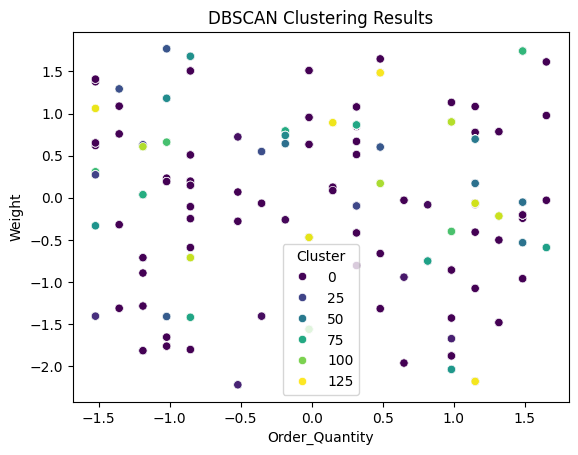

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='Order_Quantity', y='Weight', hue='Cluster', data=subdf, palette='viridis')
plt.title('DBSCAN Clustering Results')
plt.show()

# Conclusions:
X-axis (Order_Quantity): This represents the quantity of orders for each SKU.
Y-axis (Weight): This represents the weight of each SKU.


Cluster 0 : Items with moderate Order_Quantity and moderate Weight.
Cluster 1: Items with high Order_Quantity and low Weight.
Cluster 2 : Items with low Order_Quantity and high Weight.
Outliers: Items that do not fit well into any of these categories.


Cluster 0 items might be stored centrally to balance ease of access.
Cluster 1 items should be placed where pickers can quickly grab multiple items without heavy lifting.
Cluster 2 items may need to be near equipment that can assist with heavy lifting but in a location that doesn't impede the flow of more frequently picked items.
Outliers might be placed in locations that are less accessible, as they are not picked as often.

In [52]:
num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
num_noise = list(dbscan.labels_).count(-1)
print(f'Number of clusters: {num_clusters}')
print(f'Number of noise points: {num_noise}')
print(pd.Series(dbscan.labels_).value_counts())

Number of clusters: 126
Number of noise points: 339
-1     339
 59     34
 31     27
 1      26
 2      24
      ... 
 24      5
 89      5
 84      5
 77      5
 92      5
Name: count, Length: 127, dtype: int64


# Some more Number Crunching

In [53]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [55]:
# Evaluate clustering performance
if len(set(dbscan.labels_)) > 1:
    # Silhouette Score
    silhouette_avg = silhouette_score(subdf, dbscan.labels_)
    print(f'Silhouette Score: {silhouette_avg:.3f}')

    # Davies-Bouldin Index
    db_index = davies_bouldin_score(subdf, dbscan.labels_)
    print(f'Davies-Bouldin Index: {db_index:.3f}')

    # Calinski-Harabasz Index
    ch_index = calinski_harabasz_score(subdf, dbscan.labels_)
    print(f'Calinski-Harabasz Index: {ch_index:.3f}')
else:
    print('All points are considered noise or one cluster was formed.')

Silhouette Score: 0.778
Davies-Bouldin Index: 0.085
Calinski-Harabasz Index: 15886.610


In [56]:
# Number of clusters and noise points
num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
num_noise = list(dbscan.labels_).count(-1)
print(f'Number of clusters: {num_clusters}')
print(f'Number of noise points: {num_noise}')

Number of clusters: 126
Number of noise points: 339


# Conclusions
Cluster 0 (Standard Orders): This cluster contains the majority of the orders, indicating standard, high-frequency items. These items likely have steady demand and should be stored in easily accessible locations within the warehouse to facilitate quick picking and packing.
Cluster 1 (Bulk Orders): This cluster represents large volume orders, which could involve items with higher order quantities and larger sizes. These items might need dedicated storage areas with appropriate handling equipment to manage bulk storage and movement efficiently.
Cluster 2 (Special Orders): This smaller cluster might include items that are ordered less frequently but require special handling or storage conditions. These could be high-value or fragile items that need secure and careful storage.
Noise Points: The noise points represent outliers that do not fit into the main clusters. These could be special requests or unique items that are not commonly ordered. Understanding these outliers can help in planning for unusual storage needs or identifying potential data errors.